In [65]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [66]:
read = emcee.backends.HDFBackend("Input/Lens_Simulation.h5")

In [67]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [68]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

245.16826214843397


In [69]:
#parameters of best walker
best_walker = chain[best_log][1]

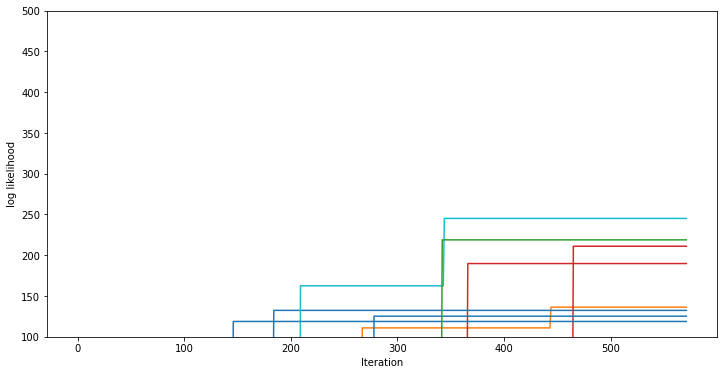

In [70]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(100, 500)
    plt.xlim()
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

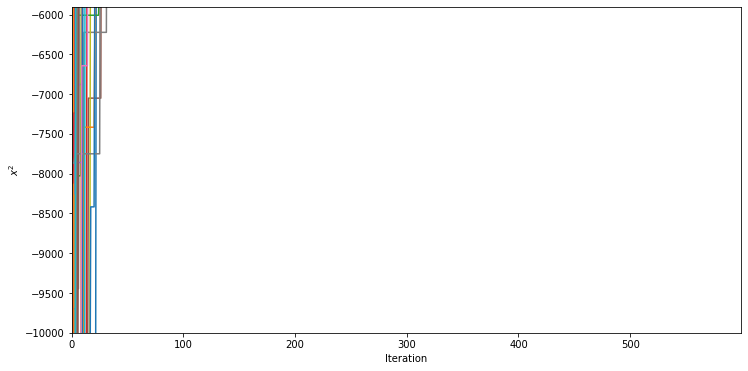

In [71]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [72]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([ 6.,  9., 10., 10.,  6., 12.,  6., 13.,  6., 10.,  8.,  4.,  8.,
        6.,  6., 13., 10., 12., 10.,  2., 13.,  6., 12., 13.,  6.,  9.,
        9.,  5.,  4.,  7., 11.,  6.,  8.,  5.,  4., 13.,  8., 11.,  3.,
        7., 11., 10.,  5.,  5.,  9., 11.,  5.,  4., 10.,  4.,  5.,  8.,
       11.,  4., 11.,  8.,  9.,  7., 10.,  6.,  9., 13., 12.,  7.,  4.,
       11.,  7., 10.,  8.,  5.,  3.,  5.,  7.,  9.,  5.,  7.,  8., 12.,
        6.,  8.,  4.,  3., 11.,  9.,  9.,  6.,  9., 18.,  6.,  5.,  2.,
       10.,  7.,  8.,  8.,  9., 12.,  5.,  4.,  9.,  9.,  7.,  6.,  9.,
       11., 10.,  6., 10., 14.,  7., 11.,  7.,  6.,  4.,  4.,  6., 13.,
        6.,  6.,  4.])

[55.95308737 57.91159221 54.67884837 55.20430661 61.09149745 53.23887569
 54.33097823]
flat chain shape: (68640, 7)
flat log prob shape: (68640,)


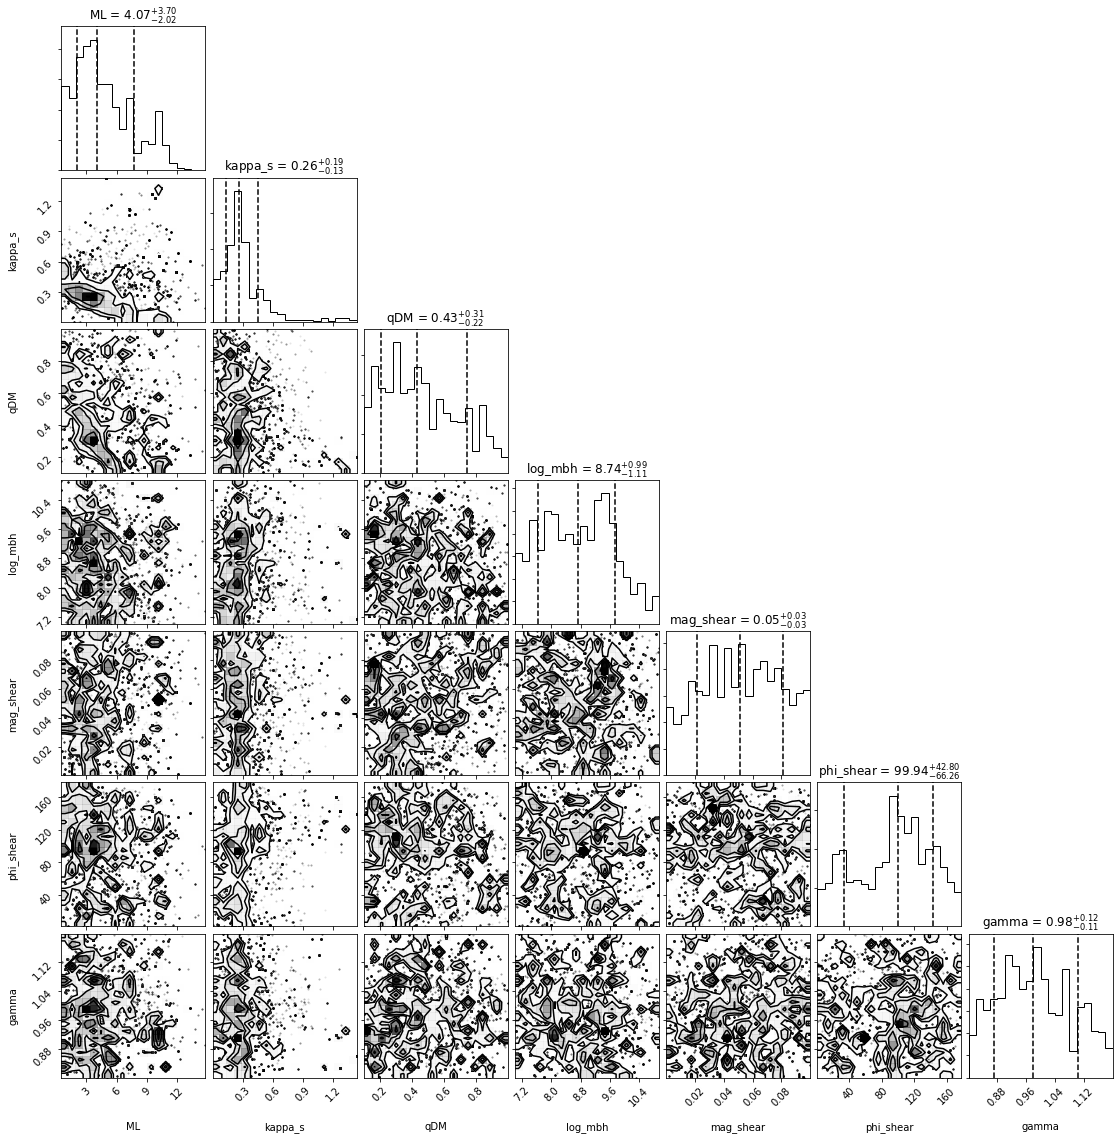

In [73]:
#Corner plots

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

122 30
flat chain shape: (1800, 7)
flat log prob shape: (1800,)


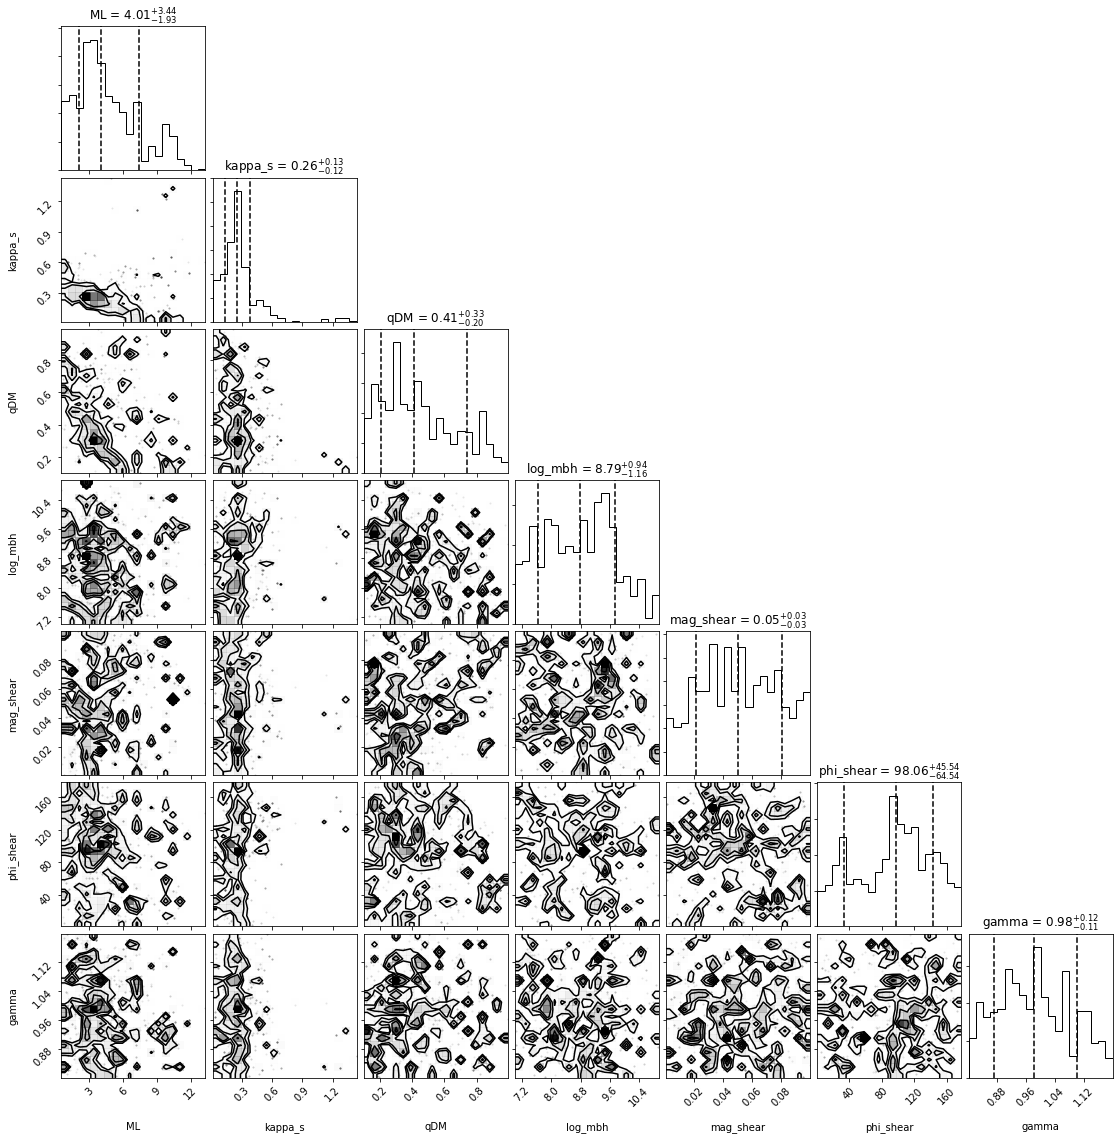

In [74]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [75]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(7):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 7;
tau: [36.26010131 37.61765043 36.85424754 35.84735509 38.60742157 34.5794519
 34.43407512]

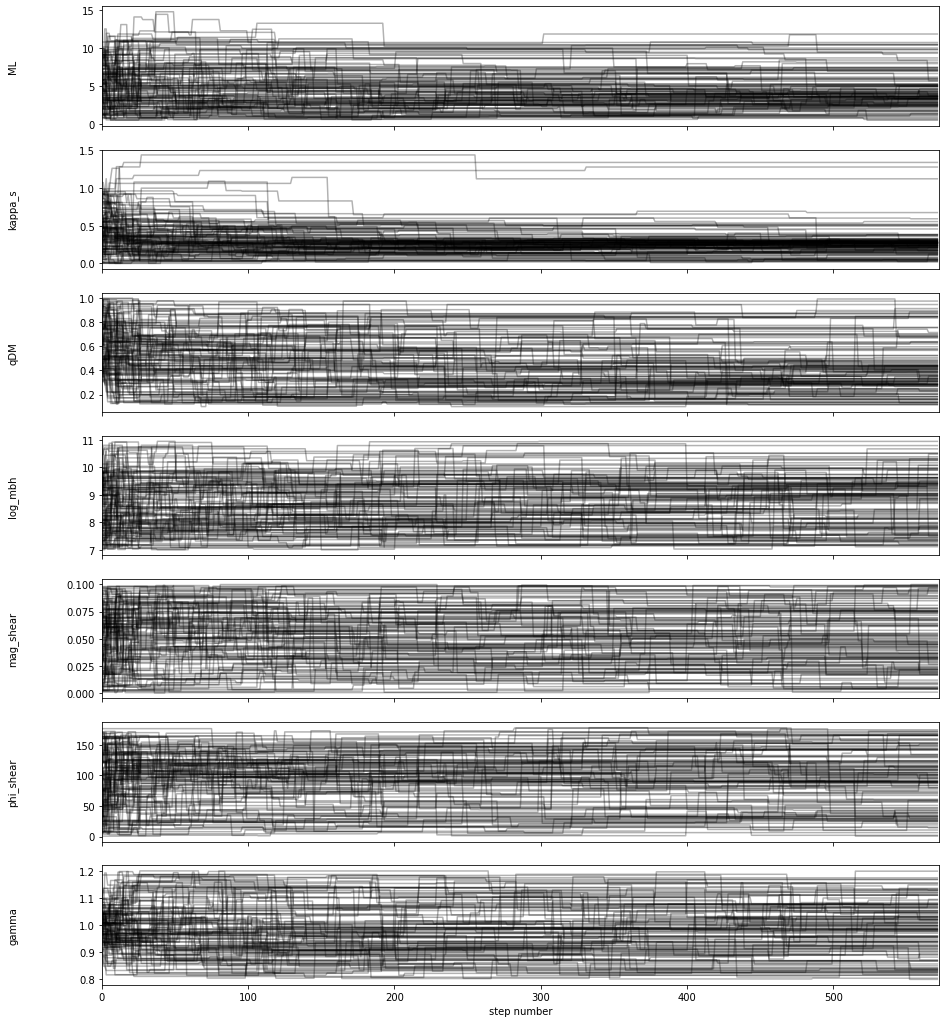

In [76]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [12]:
it, accep_tot, time, accep_100 = np.loadtxt("Input/Output_LogFile.txt", unpack=True)

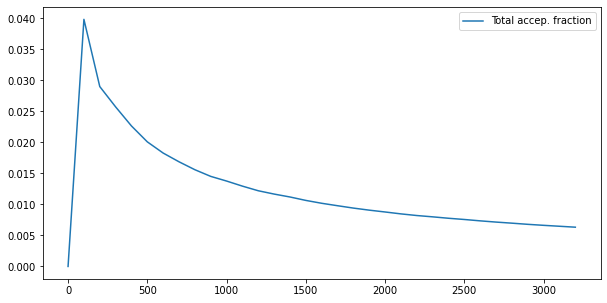

In [13]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

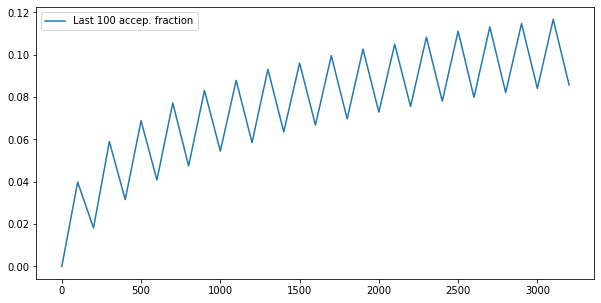

In [14]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [77]:
#Control time packages
import time
import os
os.environ["OMP_NUM_THREADS"] = "1"

#MPI
from schwimmbad import MPIPool

#General packages
import numpy as np
import emcee
import matplotlib.pyplot as plt

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#My Emcee for Pyautolens
import My_Autolens

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_5/Simulation_Data/"

In [78]:
#Reading MGE inputs
surf_lum, sigma_lum, qobs_lum = np.loadtxt("Input/JAM_Input.txt", unpack=True)      #MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("Input/eNFW.txt", unpack=True)             #DM component

## Models inicialization

"""
    To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
"""  
#Only for lensing modelling 
z_l    = 0.299                                                         #Lens Redshift
z_s    = 4.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
kappa_ = 0.075                                                         #kappa_s of DM profile
ml     = 7.00                                                          #mass to light ratio
r_s    = 11.5                                                          #scale radius [arcsec]
shear_comp = al.convert.shear_elliptical_comps_from(magnitude=0.02, phi=88) #external shear


#Autolens Data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/new_mask.fits", hdu=1, 
                                pixel_scales=imaging.pixel_scales)

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)   #Masked image
#aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

#--------------------------------------------------------------------------------------------------#
# PYAUTOLENS MODEL
#MGE mass profile
mass_profile = al.mp.MGE()    #Mass class

ell_comps    = al.convert.elliptical_comps_from(axis_ratio=qobs_dm[0], phi=0.0) #Elliptical components in Pyautolens units
eNFW         = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_, elliptical_comps=ell_comps ,scale_radius=r_s) #Analytical eNFW profile


#Components
#Do not include MGE DM component here
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml, mbh=mbh) 
mass_profile.Analytic_Model(eNFW)  #Include Analytical NFW
emcee_model = My_Autolens.Models(mass_profile=mass_profile, masked_imaging=masked_image, quiet=False)
emcee_model.include_DM_analytical(eNFW)

## Best Model

In [79]:
p0 = best_fit
p0

array([4.00925024e+00, 2.56671138e-01, 4.10926888e-01, 8.79437007e+00,
       5.02818426e-02, 9.80629014e+01, 9.81118708e-01])

ParsDic:
#------------------------------------#
{'ml': 4.009250241924844, 'kappa_s': 0.2566711380817969, 'qDM': 0.41092688752153217, 'log_mbh': 8.794370066252668, 'mag_shear': 0.050281842644031405, 'phi_shear': 98.06290140918954, 'gamma': 0.9811187083845716}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.4175078933489231)
axis_ratio: 0.4109268875215321
phi: 0.0
kappa_s: 0.2566711380817969
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: -652.4097721585633
Log Normalization -1431.276864151163
Log Evidence: -884.7337980825612
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 0.9811187083845716
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.4175078933489231)
axis_ratio: 0.4109268875215321
phi: 0.0
kappa_s:

<Figure size 720x720 with 0 Axes>

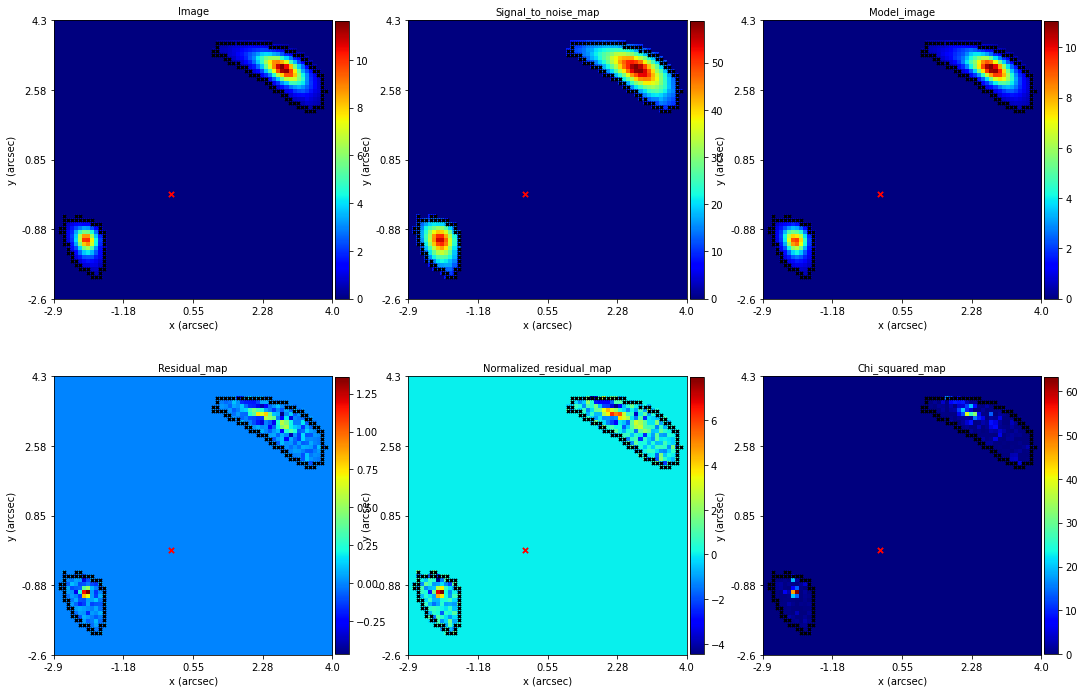

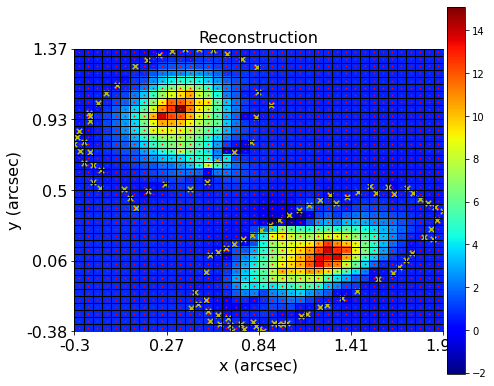

-652.4810727931767

In [80]:
plt.figure(figsize=(10,10))
emcee_model(p0)

## Best likelihood

In [81]:
p0 = best_walker
p0

array([7.13112193e+00, 5.22984696e-02, 8.34705952e-01, 7.84440523e+00,
       2.18672493e-02, 8.83947460e+01, 1.03180331e+00])

ParsDic:
#------------------------------------#
{'ml': 7.13112192894161, 'kappa_s': 0.05229846960004016, 'qDM': 0.8347059519999722, 'log_mbh': 7.844405230716156, 'mag_shear': 0.021867249285975485, 'phi_shear': 88.39474604247832, 'gamma': 1.0318033075565851}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.09009293713788)
axis_ratio: 0.8347059519999722
phi: 0.0
kappa_s: 0.05229846960004016
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 245.37055222274222
Log Normalization -1431.276864151163
Log Evidence: 16.22912725618562
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0318033075565851
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.09009293713788)
axis_ratio: 0.8347059519999722
phi: 0.0
kappa_s: 0.05

<Figure size 720x720 with 0 Axes>

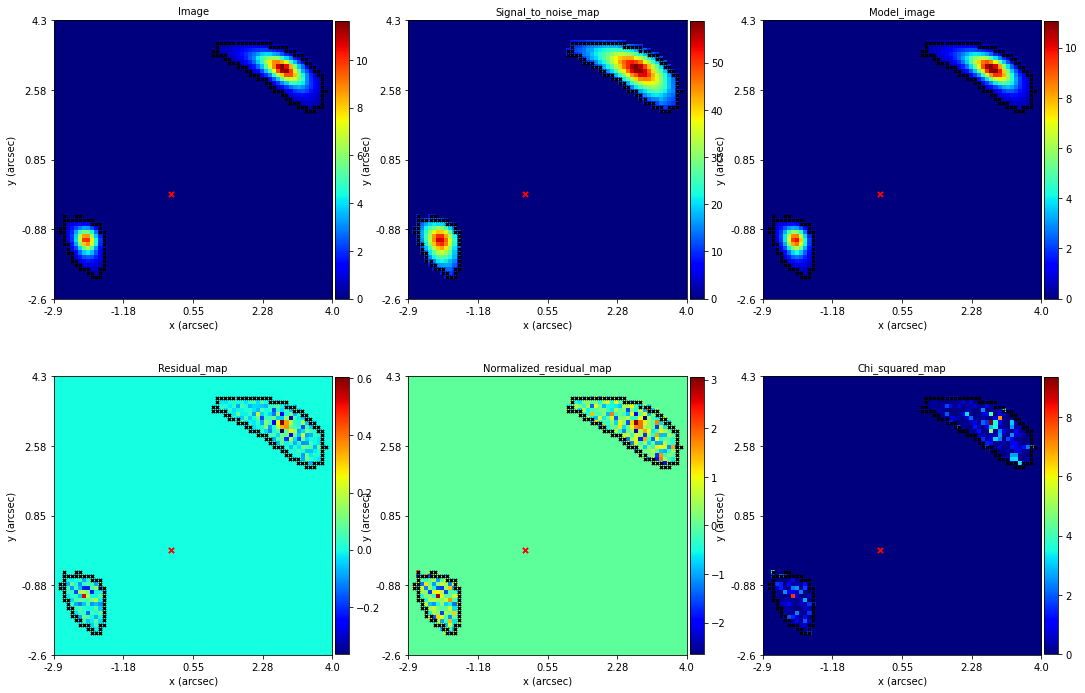

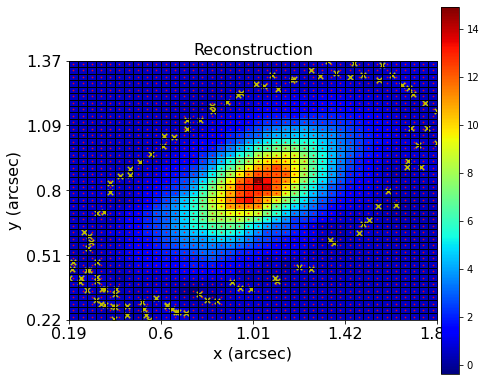

245.16826214843448

In [82]:
plt.figure(figsize=(10,10))
emcee_model(p0)

(0.9, 1.1)

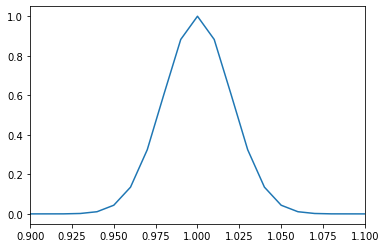

In [54]:
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
exp = np.e**(-0.5 * (x - 1)**2/0.02**2)
plt.plot(x, exp)
plt.xlim(0.9, 1.1)